In [191]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances
from Matrix_D import Matrix_D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import scipy.io
import pandas as pd

# load data
x = scipy.io.loadmat('data/isomap.mat')['images'].T

# Step 1: build a weighted graph A using nearest neigbors
# compute pairwise distances between pictures
A = pairwise_distances(x,x,metric = 'l2')
m = A.shape[0] # number of nodes
n_neighbors = 101
for i in range(m):
    # find the threshold epsilon so that each node has at least 100 neighbors
    threshold = np.partition(A[i],n_neighbors)[n_neighbors-1]    
    for j in range(m):
        if A[i,j] > threshold:
            A[i,j] = 1e6 # set distance to be large if two nodes are unconnected
            
A = (A + A.T)/2 # make the similarity matrix symmetric

# Step 2: Compute pairwise shortest distance matrix
D = Matrix_D(A) 

# visualize the similarity matrix
plt.imshow(A)
plt.show()

# Step 3: Use a centering matrix H to get C
H = np.eye(m) - np.ones((m,m))/m
C = np.matmul(H,D*D)
C = np.matmul(C,H)
C = -C/2
C = (C + C.T)/2

# eigendecomposition on C
lambdas, w = np.linalg.eig(C)
k = 2
lambdas = np.sqrt(lambdas[:k])
w = w[:,0:k]

# obtain the projected 2d data set after the isomap
z = np.matmul(w,np.diag(lambdas))

# selected images to show in the 2D scatter plot
selected_image_idx = [493, 298, 351, 604, 201,228, 101, 697, 357, 114, 265, 532, 343, 520, 506, 471, 517,
                      43, 293, 40, 323, 363, 25, 652, 558, 422, 525, 259, 542, 194, 633, 644]

# function to visualize the projected dataset
images = x.T
def plot_faces(z):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(-z[:, 0], -z[:, 1], '.k')
    for i in selected_image_idx:
        single_image = images[:, i].reshape(64, 64).T

        imagebox = OffsetImage(single_image, zoom=0.6, cmap = 'gray')
        ab = AnnotationBbox(imagebox, z[i], pad=0.1)
        ax.add_artist(ab)

# run the function to visualize the projected data set
plot_faces(z)

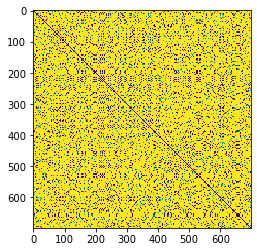

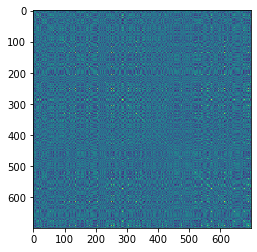

In [17]:
plt.imshow(C)
plt.show()

In [195]:
lambdas

array([401.23591105, 370.40584226])

In [196]:
np.linalg.norm(D.ravel() - D.T.ravel())

1.991624798071669e-12

In [203]:
pd.DataFrame(z).to_csv("twoPrincipalComponents.csv")

In [205]:
new_z = pd.read_csv('twoPrincipalComponents.csv')
new_z = np.array(new_z)
print(new_z[:,1:])

[[ 16.07997474  -1.01130537]
 [-16.61838056   0.79130981]
 [ 16.57404427   2.5546256 ]
 ...
 [-14.94020589 -18.91718657]
 [-16.95272841  11.09131804]
 [  6.53634355 -10.12202182]]


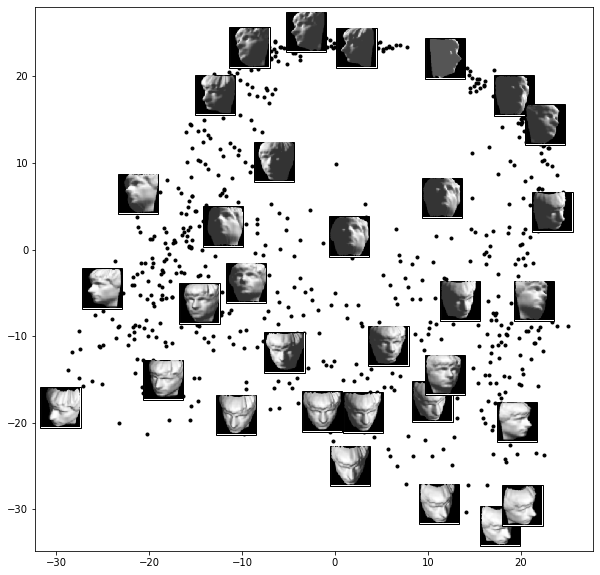

In [232]:
plot_faces(-z)

In [106]:
x.shape

(698, 4096)

In [227]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(x)

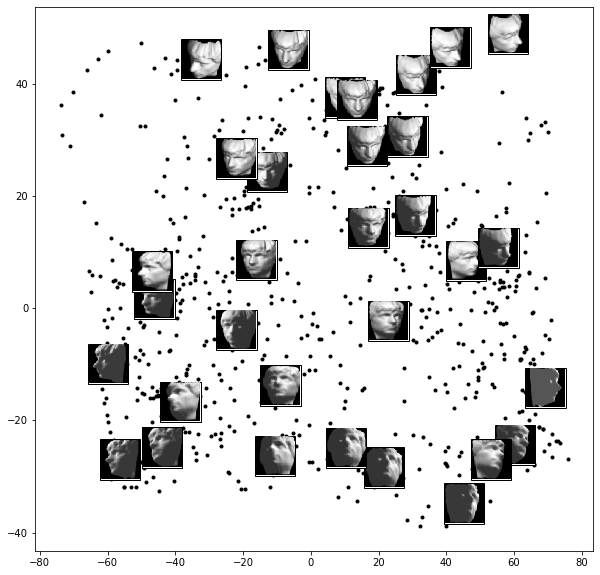

In [228]:
plot_faces(proj)

In [128]:
lambdas

array([4098.34887179, 3517.99584668])

In [235]:
from sklearn.decomposition import PCA
# apply PCA using sklearn
pca = PCA(n_components = 2)
pca.fit(x)
x_new = pca.transform(x)

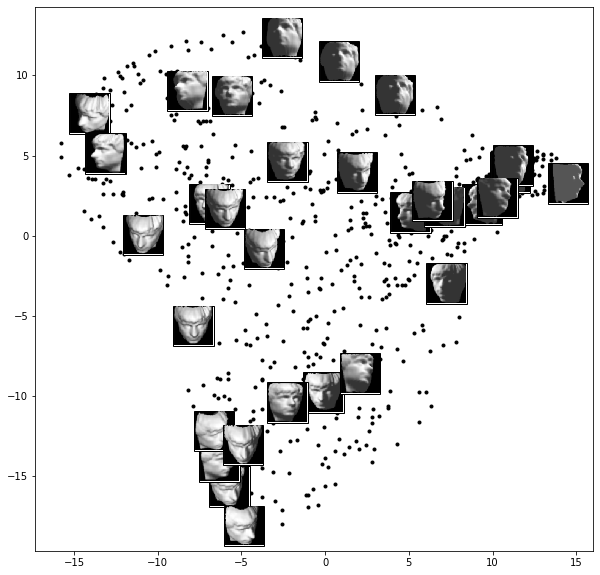

In [236]:
plot_faces(-x_new)